# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 18 

TEAM-NAME:  french-biriyani 

YOUR-ID:   2018112004

YOUR-NAME:   DIPANWITA GUHATHAKURTA

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
def grad_descent(x_obs,y_obs,kin,lr,num_iter,tol):
    del_k = 0
    k = kin
    n = 0 
    while (n<num_iter):
        a = k[0]
        m = k[1]
        s = k[2]
        term1 = np.exp(-1/(2*s*s)*np.square(x_obs-m))
        J = np.array([term1,a*(x_obs-m)/(s**2)*term1,a*(x_obs-m)**2/(s**3)*term1])
        r = a*term1.reshape(-1,1) - y_obs.reshape(-1,1)
        r_list.append(np.linalg.norm(r)**2)
        J_F = J @ r
        del_k = -lr * J_F
        k_prev = k
        k = k + del_k
        k_new = k
        if (np.linalg.norm(k_new-k_prev)<tol):
            break
        n +=1
    return k, n
def gauss_newton(x_obs,y_obs,kin,num_iter,tol):
    del_k = 10000
    k = kin
    n = 0
    while (n<num_iter):
        a = k[0]
        m = k[1]
        s = k[2]
        term1 = np.exp(-1/(2*s*s)*np.square(x_obs-m))
        J = np.array([term1,a*(x_obs-m)/(s**2)*term1,a*(x_obs-m)**2/(s**3)*term1])
        r = a*term1.reshape(-1,1) - y_obs.reshape(-1,1)
        r_list.append(np.linalg.norm(r)**2)
        J_F = (np.linalg.inv(J @ J.T)) @ J @ r
        del_k = -J_F
        k_prev = k
        k = k + del_k
        k_new = k
        if (np.linalg.norm(k_new-k_prev)<tol):
            break
        n +=1
    return k, n
def lm(x_obs,y_obs,kin,num_iter,tol,lambd):
    r_list.append(0)
    del_k = 10000
    k = kin
    n = 0
    while (n<num_iter):
        a = k[0]
        m = k[1]
        s = k[2]
        term1 = np.exp(-1/(2*s*s)*np.square(x_obs-m))
        J = np.array([term1,a*(x_obs-m)/(s**2)*term1,a*(x_obs-m)**2/(s**3)*term1]).T
        r = a*term1.reshape(-1,1) - y_obs.reshape(-1,1)
        r_list.append(np.linalg.norm(r)**2)
        cost_prev = r_list[-1]
        a = J.T @ J
        JI = np.identity(3)
        JI[0,0] = a[0,0]
        JI[1,1] = a[1,1]
        JI[2,2] = a[2,2]
        a = a + lambd*JI
        J_F = np.linalg.inv(a) @ J.T @ r
        del_k = -J_F
        k_prev = k
        k_new = k + del_k
        a1 = k_new[0]
        m1 = k_new[1]
        s1 = k_new[2]
        term2 = np.exp(-1/(2*s1*s1)*np.square(x_obs-m1))
        r_new = a1*term2.reshape(-1,1) - y_obs.reshape(-1,1)
        cost_new = np.linalg.norm(r_new)**2
        if (cost_new<cost_prev):
            lambd = lambd/10
            k = k_new
        else:
            lambd = lambd*10
        if (np.linalg.norm(k_new-k_prev)<tol):
#             print (n)
            break
        n +=1
    return k, n
def plot_gd(x_obs,y_obs,k0,lr,num_iter,tol):
    k_final1, n1 = grad_descent(x_obs,y_obs,k0,lr,num_iter,tol)
    print ("Final k1:",k_final1)
    y_app1 = k_final1[0]*np.exp(-(x_obs-k_final1[1])**2/(2*k_final1[2]*k_final1[2]))
    plt.subplot(121)
    plt.plot(x_obs,y_obs,'r')
    plt.scatter(x_obs,y_obs,c='y')
    plt.plot(x_obs,y_app1,'b')
    plt.legend(['Ground truth plot','Fit plot'])
    plt.xlabel('x_obs')
    plt.ylabel('y_obs')
    plt.title("Data and fit plot for GD")
    plt.subplot(122)
    plt.plot(r_list)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost function')
    plt.title("Cost fn vs no. of iterations for GD")
    plt.show()
def plot_gn(x_obs,y_obs,k0,lr,num_iter,tol):
    k_final2, n2 = gauss_newton(x_obs,y_obs,k0,num_iter,tol)
    print ("Final k2:",k_final2)
    y_app2 = k_final2[0]*np.exp(-(x_obs-k_final2[1])**2/(2*k_final2[2]*k_final2[2]))
    plt.subplot(121)
    plt.plot(x_obs,y_obs,'r')
    plt.scatter(x_obs,y_obs,c='y')
    plt.plot(x_obs,y_app2,'b')
    plt.legend(['Ground truth plot','Fit plot'])
    plt.xlabel('x_obs')
    plt.ylabel('y_obs')
    plt.title("Data and fit plot for GN")
    plt.subplot(122)
    plt.plot(r_list)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost function')
    plt.title("Cost fn vs no. of iterations for GN")
    plt.show()
def plot_lm(x_obs,y_obs,k0,lr,num_iter,tol,lambd):
    k_final3, n3 = lm(x_obs,y_obs,k0,num_iter,tol,lambd)
    print ("Final k3:",k_final3)
    y_app3 = k_final3[0]*np.exp(-(x_obs-k_final3[1])**2/(2*k_final3[2]*k_final3[2]))
    plt.subplot(121)
    plt.plot(x_obs,y_obs,'r')
    plt.scatter(x_obs,y_obs,c='y')
    plt.plot(x_obs,y_app3,'b')
    plt.legend(['Ground truth plot','Fit plot'])
    plt.xlabel('x_obs')
    plt.ylabel('y_obs')
    plt.title("Data and fit plot for LM")
    plt.subplot(122)
    plt.plot(r_list)
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost function')
    plt.title("Cost fn vs no. of iterations for LM")
    plt.show()
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

Final k1: [[ 9.78969014]
 [ 0.22122018]
 [21.25474267]]


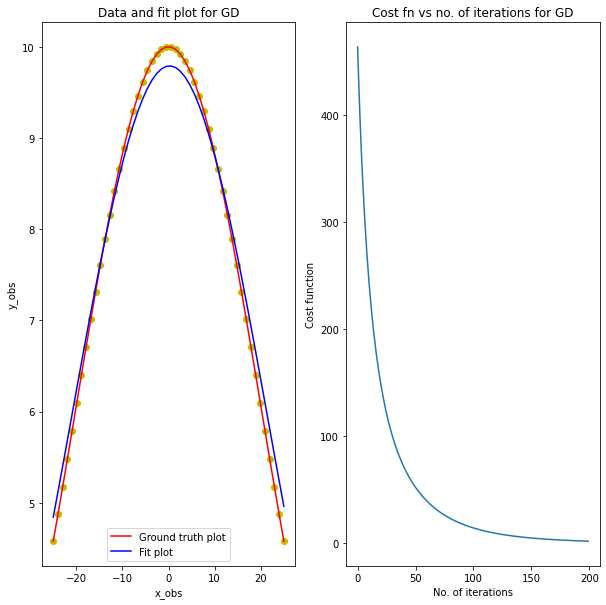

Final k2: [[ 1.00000000e+01]
 [-2.08695976e-16]
 [ 2.00000000e+01]]


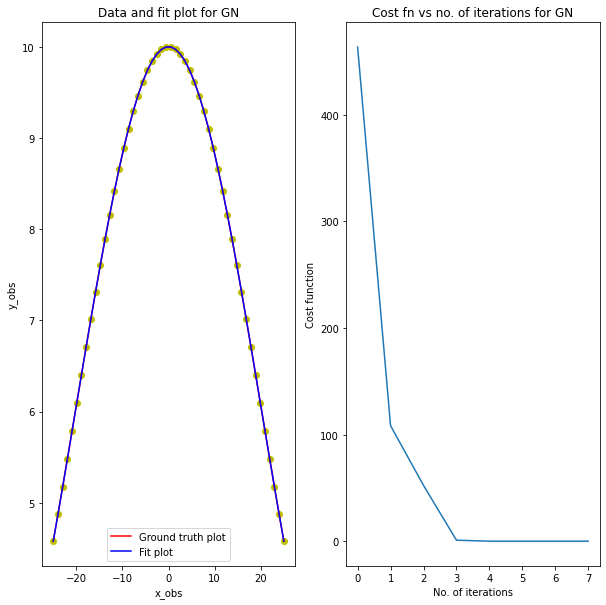

Final k3: [[ 1.00000000e+01]
 [-3.12942481e-16]
 [ 2.00000000e+01]]


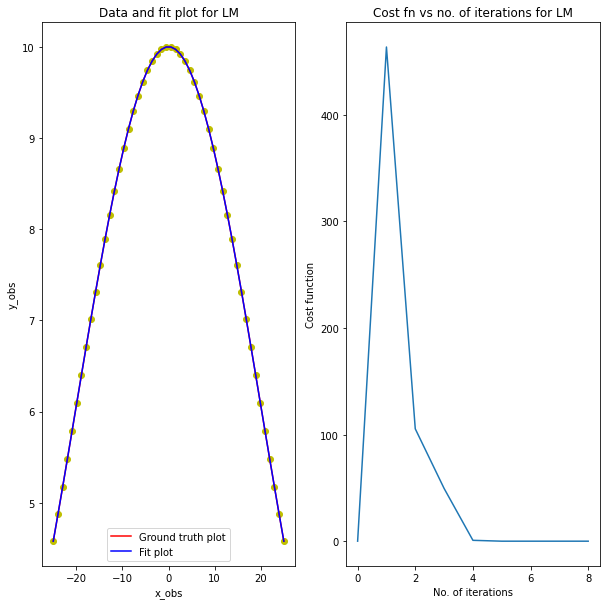

In [3]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1  #
num_obs = 50
r_list = []
x_obs = np.linspace(-25,25,num_obs)
a_gt = 10
m_gt = 0
s_gt = 20
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k0 = np.array([10,13,19.12]).reshape(3,1)
lr = 0.01
tol = 1e-15
num_iter = 200

f, axs = plt.subplots(1,2,figsize=(10,10))
k0 = np.array([10,13,19.12]).reshape(3,1)
plot_gd(x_obs,y_obs,k0,lr,num_iter,tol)
r_list.clear()

f, axs = plt.subplots(1,2,figsize=(10,10))
plot_gn(x_obs,y_obs,k0,lr,num_iter,tol)
r_list.clear()

lambd = 0.01
f, axs = plt.subplots(1,2,figsize=(10,10))
k0 = np.array([10,13,19.12]).reshape(3,1)
plot_lm(x_obs,y_obs,k0,lr,num_iter,tol,lambd)
# print (r_list[-1])
r_list.clear()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Experiments on Gradient Descent

### Variation of learning rate

Error: 2.7687440051447067e-26
Iteration converged at:(max 10000): 2687
Error: 7.170745628458999e-27
Iteration converged at:(max 10000): 1365
Error: 2.6766050514148927e-27
Iteration converged at:(max 10000): 918
Error: 1.7875588112308128e-27
Iteration converged at:(max 10000): 689


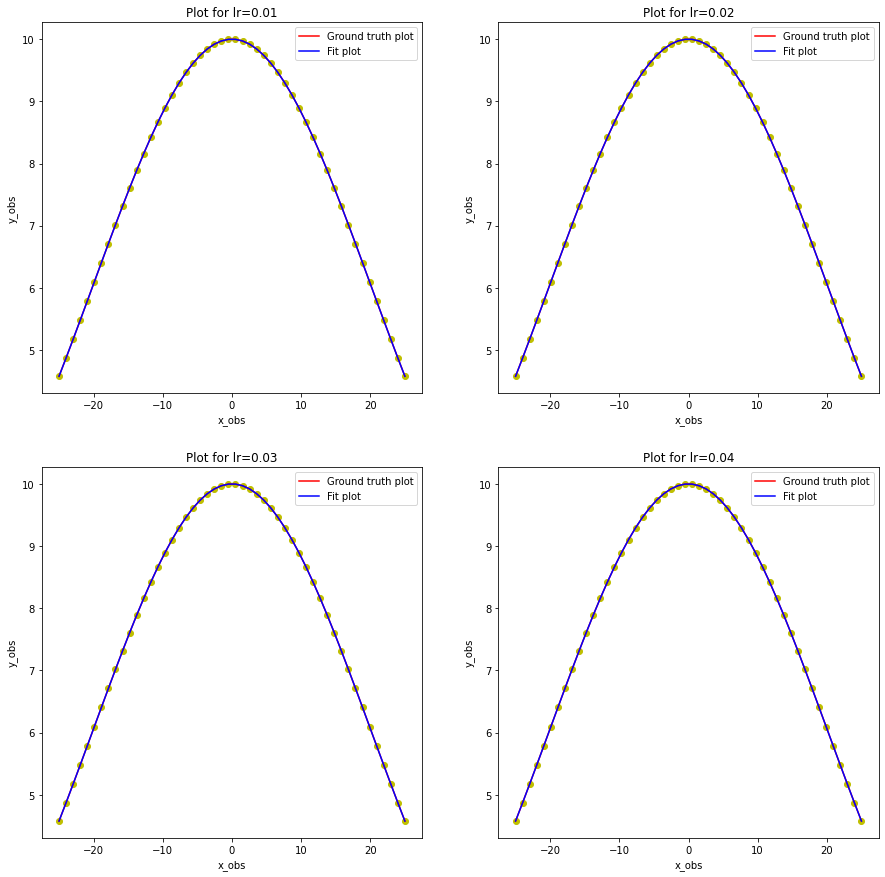

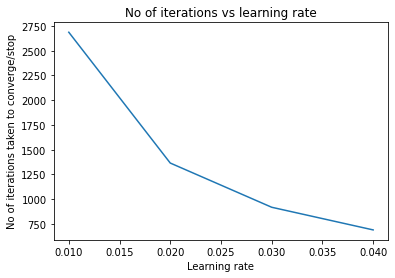

In [4]:
num_obs = 50
x_obs = np.linspace(-25,25,num_obs)
a_gt = 10
m_gt = 0
s_gt = 20
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
lr_list = []
iter_list = []
i = 0.01
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<=0.04):
    r_list.clear()
    lr_list.append(i)
    k_gd, iter_gd = grad_descent(x_obs, y_obs, k0, i, num_iter, tol)
    y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
    print ("Error:",r_list[-1])
    substr = "22"+str(int(i/0.01))
    plt.subplot(int(substr))
    plt.plot(x_obs,y_obs,'r')
    plt.scatter(x_obs,y_obs,c='y')
    plt.plot(x_obs,y_app1,'b')
    plt.legend(['Ground truth plot','Fit plot'])
    plt.xlabel('x_obs')
    plt.ylabel('y_obs')
    plt.title("Plot for lr="+str(i))
    print ("Iteration converged at:(max 10000):",iter_gd)
    iter_list.append(iter_gd)
    i = i+0.01
plt.show()
plt.plot(lr_list,iter_list)
plt.xlabel("Learning rate")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs learning rate")
plt.show()

Error: 1.4659371130980998e-08
Iteration converged at:(max 10000): 10000
Error: 2.7687440051447067e-26
Iteration converged at:(max 10000): 2687
Error: 3226.6794123114432
Iteration converged at:(max 10000): 10000
Error: 153.1380963901375
Iteration converged at:(max 10000): 10000


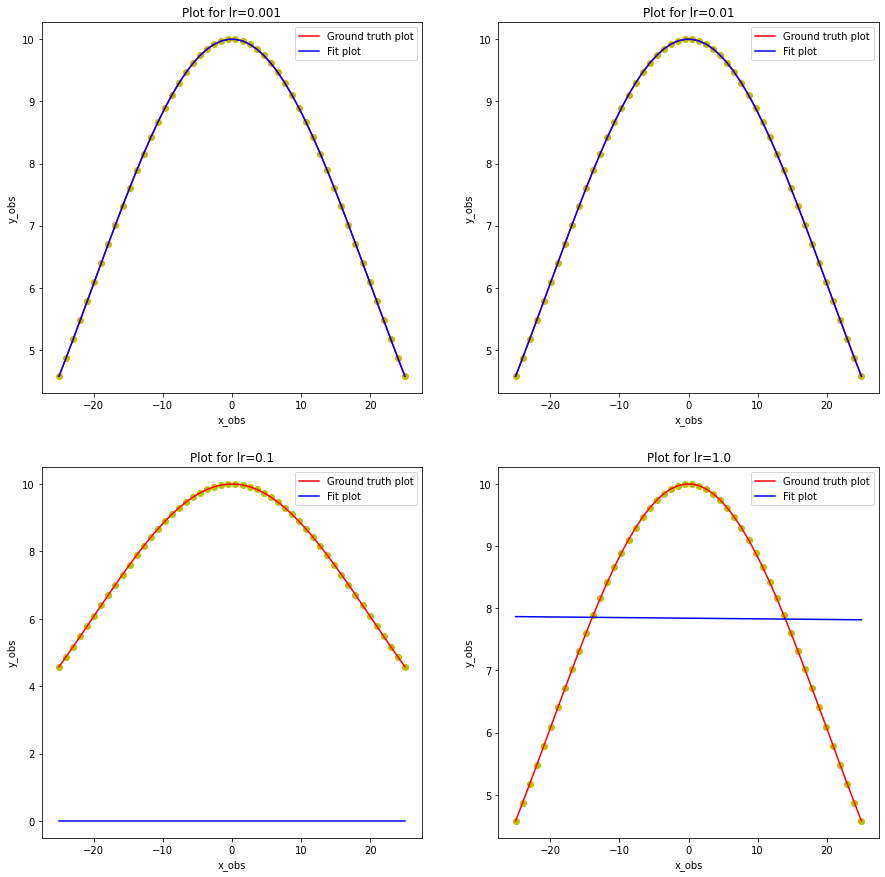

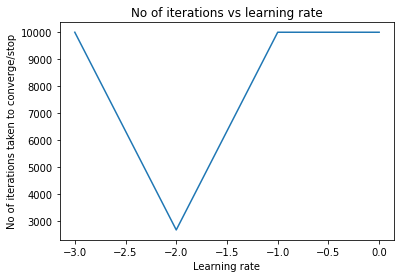

In [5]:
num_obs = 50
x_obs = np.linspace(-25,25,num_obs)
a_gt = 10
m_gt = 0
s_gt = 20
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
lr_list = []
iter_list = []
i = 0.001
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<=1):
    r_list.clear()
    lr_list.append(i)
    k_gd, iter_gd = grad_descent(x_obs, y_obs, k0, i, num_iter, tol)
    y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
    print ("Error:",r_list[-1])
    substr = "22"+str(int(math.log10(i))+4)
    plt.subplot(int(substr))
    plt.plot(x_obs,y_obs,'r')
    plt.scatter(x_obs,y_obs,c='y')
    plt.plot(x_obs,y_app1,'b')
    plt.legend(['Ground truth plot','Fit plot'])
    plt.xlabel('x_obs')
    plt.ylabel('y_obs')
    plt.title("Plot for lr="+str(i))
    print ("Iteration converged at:(max 10000):",iter_gd)
    iter_list.append(iter_gd)
    i = i*10
plt.show()
plt.plot(np.log10(lr_list),iter_list)
plt.xlabel("Learning rate")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs learning rate")
plt.show()

### Variation in no. of observations

Iteration converged at:(max 10000): 5043
Error: 5.797654336831304e-26
Iteration converged at:(max 10000): 2687
Error: 2.7687440051447067e-26
Iteration converged at:(max 10000): 1834
Error: 1.987613936794861e-26
Iteration converged at:(max 10000): 1396
Error: 1.3852397495680964e-26


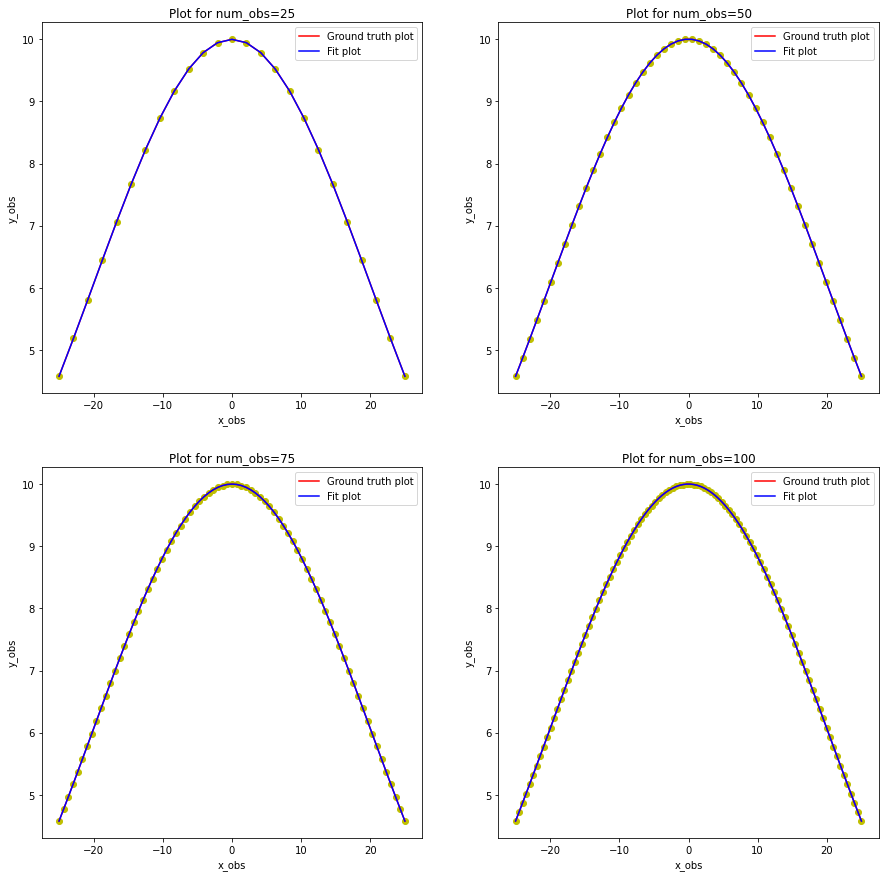

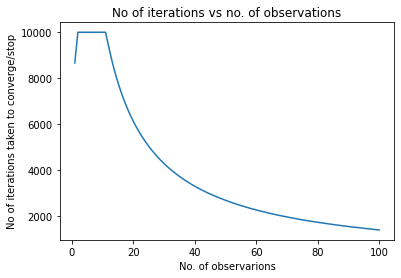

In [6]:
a_gt = 10
m_gt = 0
s_gt = 20
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
lr = 0.01
obs_list = []
iter_list = []
i = 1
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<=100):
    x_obs = np.linspace(-25,25,i)
    r_list.clear()
    y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
    k_gd, iter_gd = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
    obs_list.append(i)
    y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
    if (i%25==0):
        print ("Iteration converged at:(max 10000):",iter_gd)
        print ("Error:",r_list[-1])
        substr = "22"+str(i//25)
        plt.subplot(int(substr))
        plt.plot(x_obs,y_obs,'r')
        plt.scatter(x_obs,y_obs,c='y')
        plt.plot(x_obs,y_app1,'b')
        plt.legend(['Ground truth plot','Fit plot'])
        plt.xlabel('x_obs')
        plt.ylabel('y_obs')
        plt.title("Plot for num_obs="+str(i))
    iter_list.append(iter_gd)
    i = i+1
plt.show()
plt.plot(obs_list,iter_list)
plt.xlabel("No. of observarions")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs no. of observations")
plt.show()

### Different initialisations

Error: 2.7687440051447067e-26
Iteration converged at:(max 10000): 2687
Iteration converged at:(max 10000): 2440
Error: 2.787045578145835e-26
Iteration converged at:(max 10000): 10000
Error: 153.93189491998012


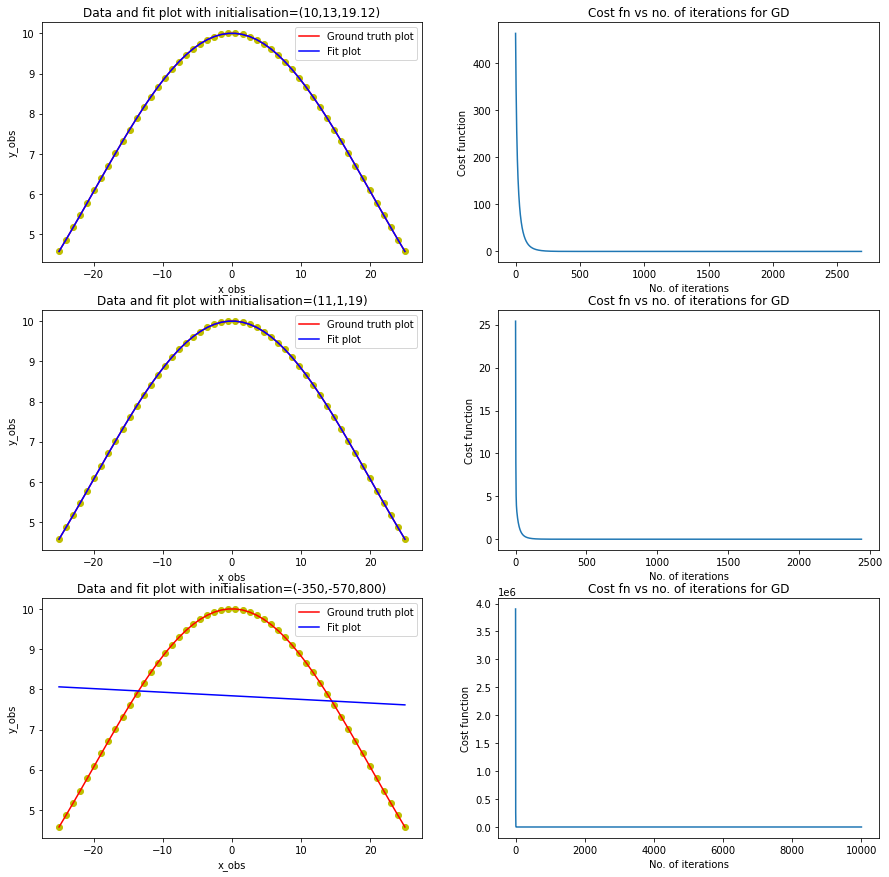

In [7]:
a_gt = 10
m_gt = 0
s_gt = 20
tol = 1e-15
num_iter = 10000
lr = 0.01
num_obs = 50

f, axs = plt.subplots(3,2,figsize=(15,15))
x_obs = np.linspace(-25,25,num_obs)
r_list.clear()
k0 = np.array([10,13,19.12]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_gd, iter_gd1 = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
print ("Error:",r_list[-1])
print ("Iteration converged at:(max 10000):",iter_gd1)
obs_list.append(i)
y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))

plt.subplot(321)
plt.plot(x_obs,y_obs,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(10,13,19.12)")
plt.subplot(322)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
k0 = np.array([11,1,19]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_gd, iter_gd1 = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
print ("Iteration converged at:(max 10000):",iter_gd1)
print ("Error:",r_list[-1])
obs_list.append(i)
y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
plt.subplot(323)
plt.plot(x_obs,y_obs,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(11,1,19)")
plt.subplot(324)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
k0 = np.array([-350,-570,800]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_gd, iter_gd1 = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
print ("Iteration converged at:(max 10000):",iter_gd1)
print ("Error:",r_list[-1])
obs_list.append(i)
y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
plt.subplot(325)
plt.plot(x_obs,y_obs,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(-350,-570,800)")
plt.subplot(326)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")
plt.show()

### Adding noise of different variances

Error: 0.5169410189654564
Error: 41.71832349757813
Error: 4394.259844534809


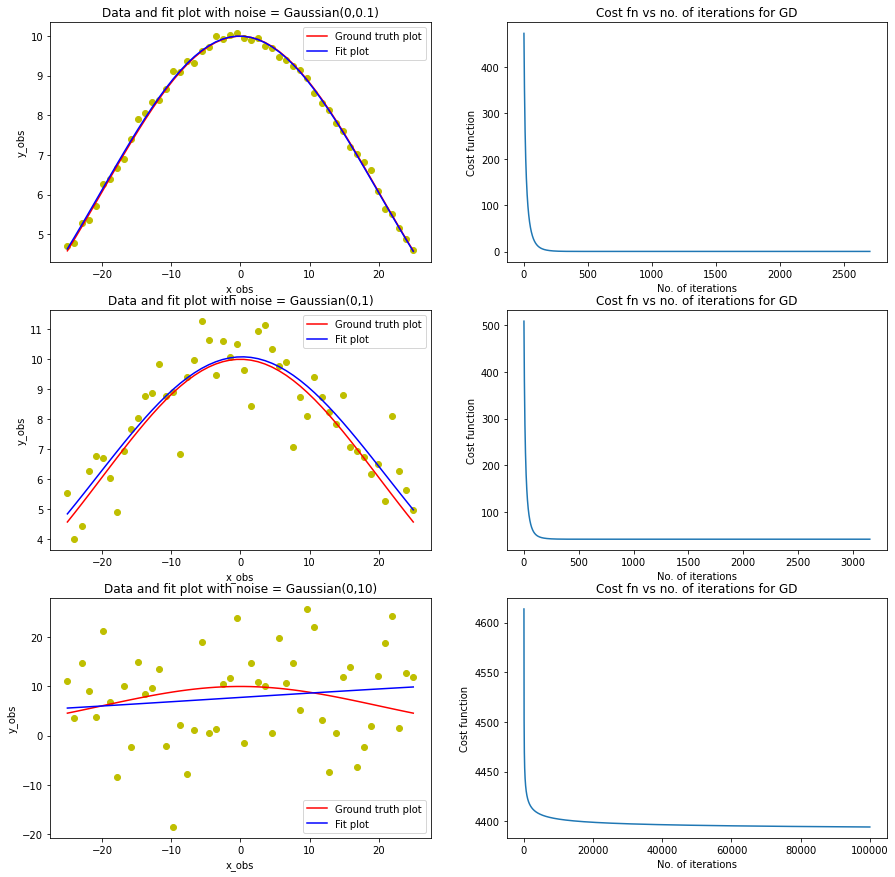

In [8]:
a_gt = 10
m_gt = 0
s_gt = 20
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 100000
lr = 0.01
num_obs = 50

f, axs = plt.subplots(3,2,figsize=(15,15))
r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,0.1,num_obs)
y_obs = y_gt + noise
k_gd, iter_gd1 = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
obs_list.append(i)
y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
print ("Error:",r_list[-1])
plt.subplot(321)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,0.1)")
plt.subplot(322)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,1,num_obs)
y_obs = y_gt + noise
k_gd, iter_gd2 = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
obs_list.append(i)
y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
print ("Error:",r_list[-1])
plt.subplot(323)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,1)")
plt.subplot(324)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,10,num_obs)
y_obs = y_gt + noise
k_gd, iter_gd3 = grad_descent(x_obs, y_obs, k0, lr, num_iter, tol)
obs_list.append(i)
y_app1 = k_gd[0]*np.exp(-(x_obs-k_gd[1])**2/(2*k_gd[2]*k_gd[2]))
print ("Error:",r_list[-1])
plt.subplot(325)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,10)")
plt.subplot(326)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

plt.show()


## Experiments on Gauss Newton

### Variation in no. of observations

Iters to converge/stop: 7
Error: 3.94430452610506e-30
Iters to converge/stop: 7
Error: 0.0
Iters to converge/stop: 7
Error: 0.0
Iters to converge/stop: 7
Error: 3.155443620884048e-29


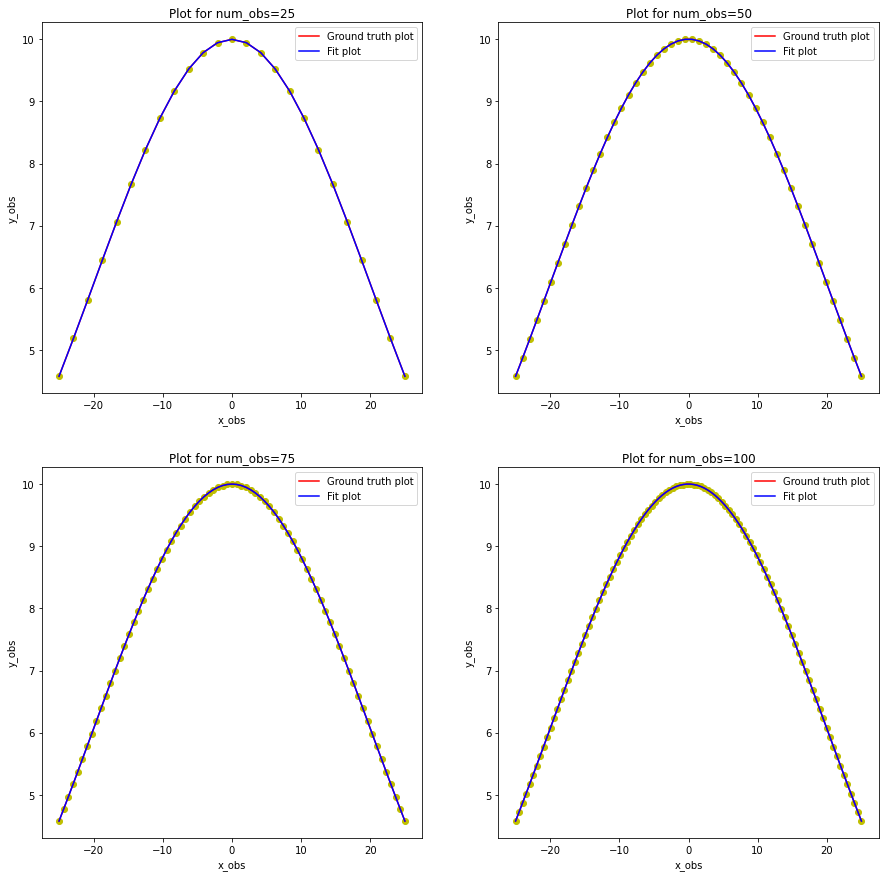

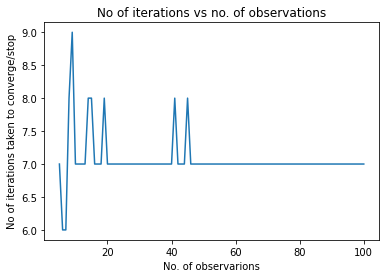

In [9]:
a_gt = 10
m_gt = 0
s_gt = 20
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
obs_list = []
iter_list = []
i = 5
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<=100):
#     print (i)
    x_obs = np.linspace(-25,25,i)
    r_list.clear()
    y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
    k_gn, iter_gn = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
    obs_list.append(i)
    y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
    if (i%25==0):
        print ("Iters to converge/stop:",iter_gn)
        print ("Error:",r_list[-1])
        substr = "22"+str(i//25)
        plt.subplot(int(substr))
        plt.plot(x_obs,y_obs,'r')
        plt.scatter(x_obs,y_obs,c='y')
        plt.plot(x_obs,y_app1,'b')
        plt.legend(['Ground truth plot','Fit plot'])
        plt.xlabel('x_obs')
        plt.ylabel('y_obs')
        plt.title("Plot for num_obs="+str(i))
    iter_list.append(iter_gn)
    i = i+1
plt.show()
plt.plot(obs_list,iter_list)
plt.xlabel("No. of observarions")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs no. of observations")
plt.show()

### Different initialisations

Iteration converged at:(max 200): 7
Error: 0.0
Iteration converged at:(max 200): 4
Error: 0.0
Iteration converged at:(max 200): 8
Error: 0.0


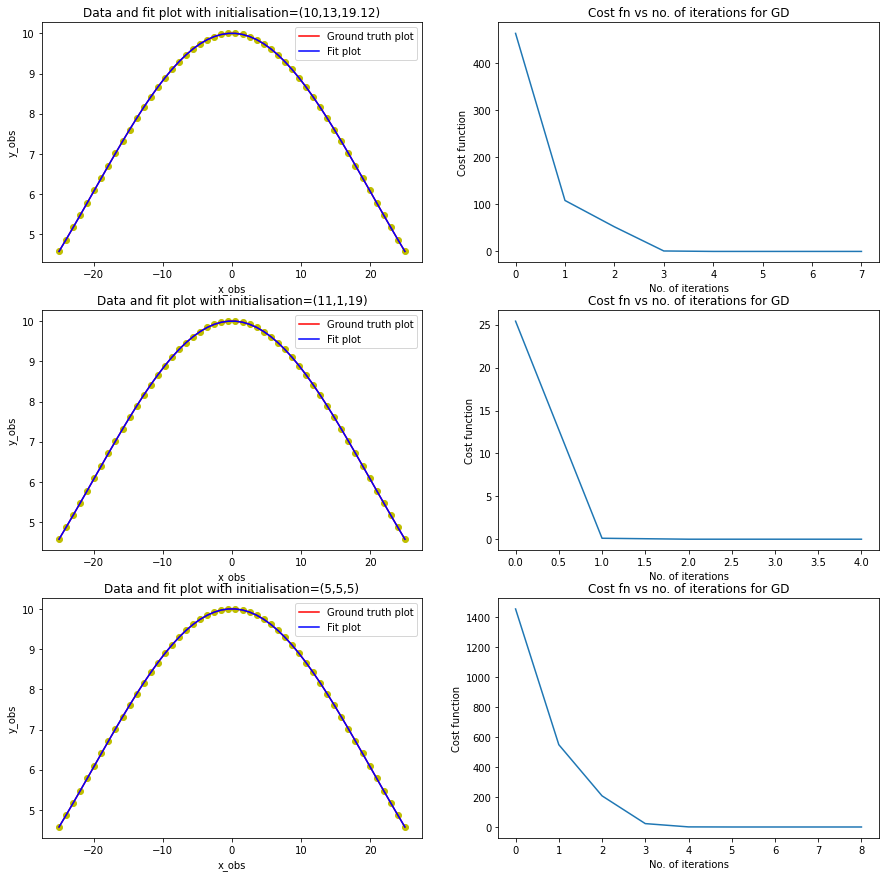

In [10]:
a_gt = 10
m_gt = 0
s_gt = 20
tol = 1e-15
num_iter = 200
num_obs = 50

f, axs = plt.subplots(3,2,figsize=(15,15))
x_obs = np.linspace(-25,25,num_obs)
r_list.clear()
k0 = np.array([10,13,19.12]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_gn, iter_gn1 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
print ("Iteration converged at:(max 200):",iter_gn1)
print ("Error:",r_list[-1])
plt.subplot(321)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(10,13,19.12)")
plt.subplot(322)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
k0 = np.array([11,1,19]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_gn, iter_gn2 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
print ("Iteration converged at:(max 200):",iter_gn2)
print ("Error:",r_list[-1])
plt.subplot(323)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(11,1,19)")
plt.subplot(324)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
k0 = np.array([15,15,15]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_gn, iter_gn3 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
print ("Iteration converged at:(max 200):",iter_gn3)
print ("Error:",r_list[-1])
plt.subplot(325)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(5,5,5)")
plt.subplot(326)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")
plt.show()

In [11]:
#Uncomment this cell to see that Gauss Newton runs into issues if J*J.T is not invertible.
#------------------------------------------------------------------------------------------#

# r_list.clear()
# k0 = np.array([-350,-570,800]).reshape(3,1)
# y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
# k_gn, iter_gn3 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
# y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
# print ("Iteration converged at:(max 200):",iter_gn3)
# print ("Error:",r_list[-1])
# plt.subplot(325)
# plt.plot(x_obs,y_gt,'r')
# plt.scatter(x_obs,y_obs,c='y')
# plt.plot(x_obs,y_app1,'b')
# plt.legend(['Ground truth plot','Fit plot'])
# plt.xlabel('x_obs')
# plt.ylabel('y_obs')
# plt.title("Data and fit plot with initialisation=(5,5,5)")
# plt.subplot(326)
# plt.plot(r_list)
# plt.xlabel('No. of iterations')
# plt.ylabel('Cost function')
# plt.title("Cost fn vs no. of iterations for GD")
# plt.show()

LinAlgError: Singular matrix

##### Note:
I have deliberately kept the error to show that Gauss Newton fails in cases where the matrix J*J.T* becomes singular as in the above example. 

### Adding noise of different variances

Iteration converged at:(max 10000): 10
Error: 0.59548866835126
Iteration converged at:(max 10000): 12
Error: 48.52398234077579
Iteration converged at:(max 10000): 48
Error: 5018.95749163875


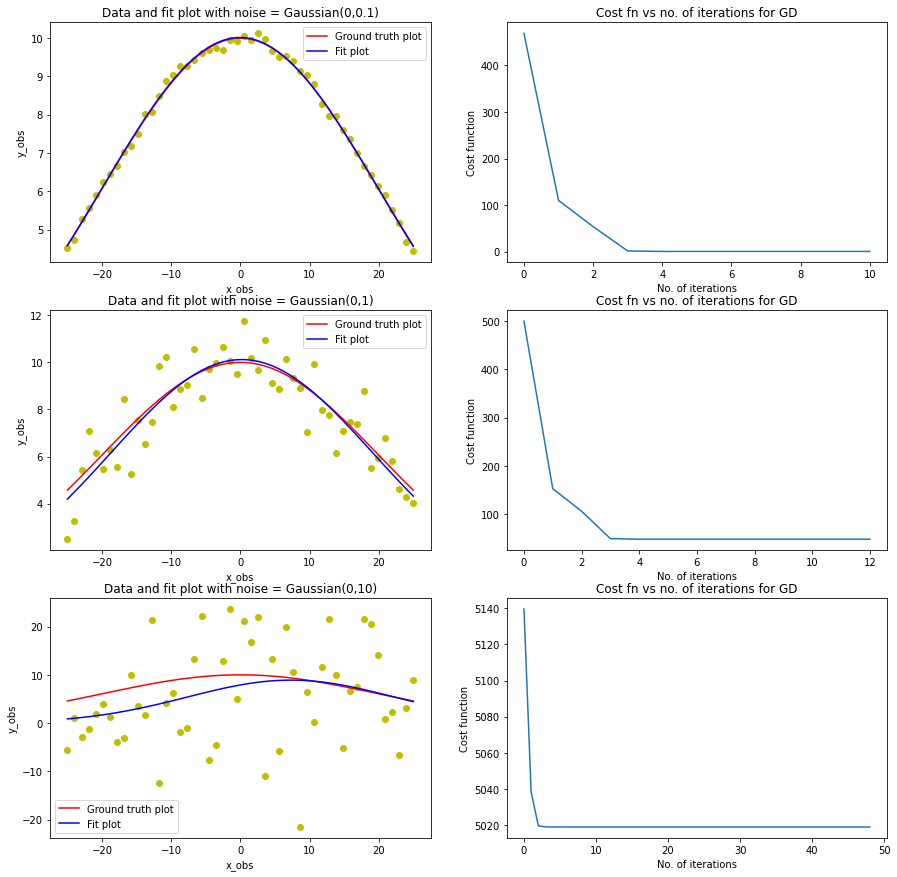

In [14]:
a_gt = 10
m_gt = 0
s_gt = 20
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
num_obs = 50

f, axs = plt.subplots(3,2,figsize=(15,15))
r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,0.1,num_obs)
y_obs = y_gt + noise
k_gn, iter_gn1 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
print ("Iteration converged at:(max 10000):",iter_gn1)
print ("Error:",r_list[-1])
plt.subplot(321)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,0.1)")
plt.subplot(322)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,1,num_obs)
y_obs = y_gt + noise
k_gn, iter_gn2 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
print ("Iteration converged at:(max 10000):",iter_gn2)
print ("Error:",r_list[-1])
plt.subplot(323)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,1)")
plt.subplot(324)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,10,num_obs)
y_obs = y_gt + noise
k_gn, iter_gn3 = gauss_newton(x_obs, y_obs, k0, num_iter, tol)
y_app1 = k_gn[0]*np.exp(-(x_obs-k_gn[1])**2/(2*k_gn[2]*k_gn[2]))
print ("Iteration converged at:(max 10000):",iter_gn3)
print ("Error:",r_list[-1])
plt.subplot(325)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,10)")
plt.subplot(326)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

plt.show()


## Experiments on LM

### Variation in lambda

Error: 1.1044052673094165e-29
Iteration converged at:(max 10000): 7
Error: 1.1044052673094165e-29
Iteration converged at:(max 10000): 7
Error: 0.0
Iteration converged at:(max 10000): 7
Error: 3.1554436208840472e-30
Iteration converged at:(max 10000): 7


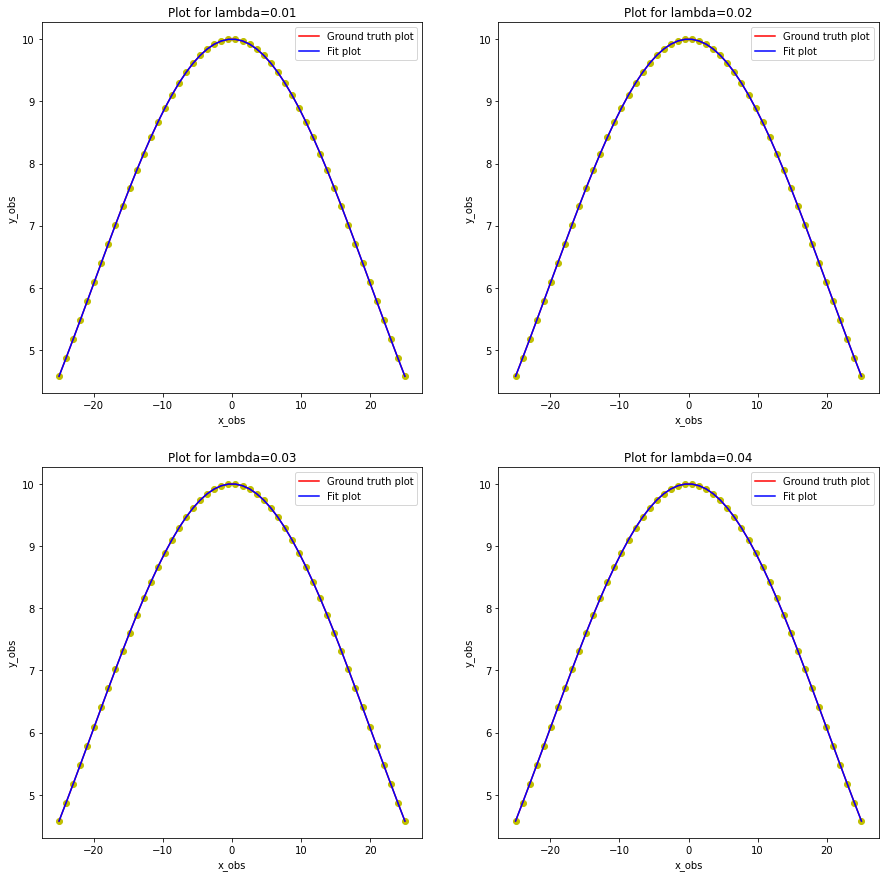

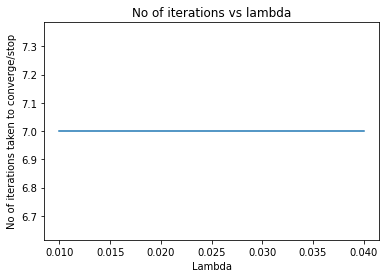

In [15]:
num_obs = 50
x_obs = np.linspace(-25,25,num_obs)
a_gt = 10
m_gt = 0
s_gt = 20
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
lr_list = []
iter_list = []
i = 0.01
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<0.05):
    r_list.clear()
    lr_list.append(i)
    k_lm, iter_lm = lm(x_obs, y_obs, k0, num_iter, tol,i)
    y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
    print ("Error:",r_list[-1])
    substr = "22"+str(int(i/0.01))
    plt.subplot(int(substr))
    plt.plot(x_obs,y_obs,'r')
    plt.scatter(x_obs,y_obs,c='y')
    plt.plot(x_obs,y_app1,'b')
    plt.legend(['Ground truth plot','Fit plot'])
    plt.xlabel('x_obs')
    plt.ylabel('y_obs')
    plt.title("Plot for lambda="+str(i))
    print ("Iteration converged at:(max 10000):",iter_lm)
    iter_list.append(iter_lm)
    i = i+0.01
plt.show()
plt.plot(lr_list,iter_list)
plt.xlabel("Lambda")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs lambda")
plt.show()

Error: 0.0
Iteration converged at:(max 10000): 8
Error: 1.419949629397821e-29
Iteration converged at:(max 10000): 8
Error: 0.0
Iteration converged at:(max 10000): 8
Error: 0.0
Iteration converged at:(max 10000): 9


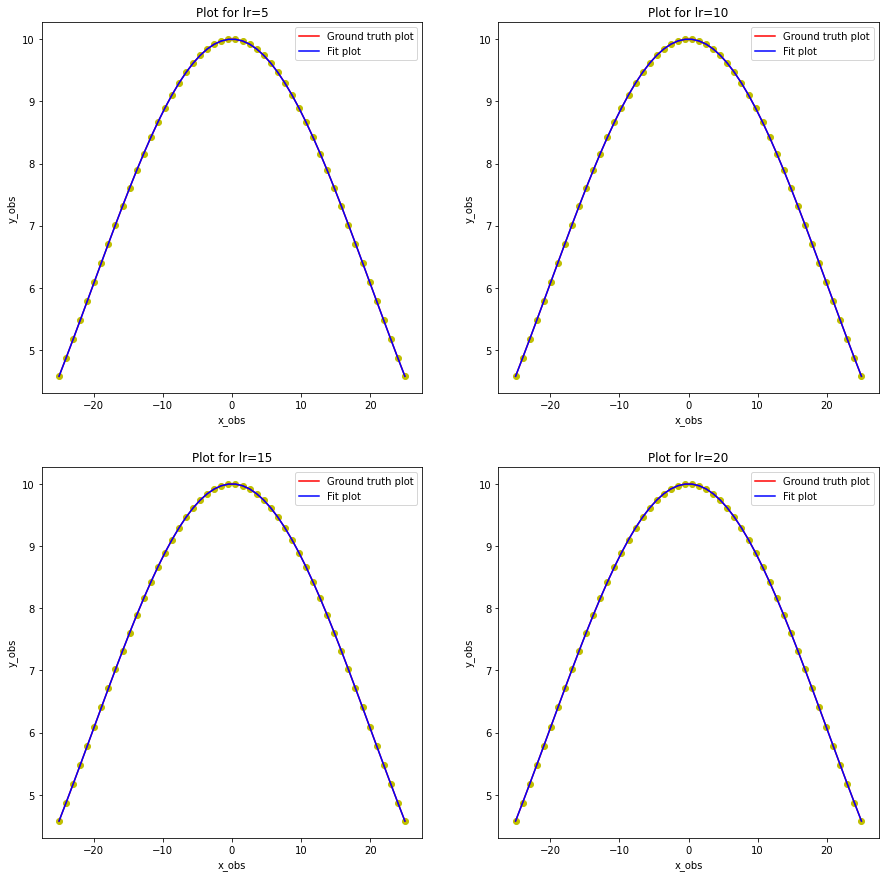

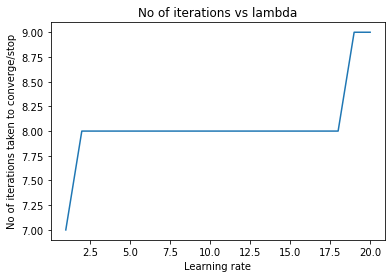

In [16]:
num_obs = 50
x_obs = np.linspace(-25,25,num_obs)
a_gt = 10
m_gt = 0
s_gt = 20
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
lr_list = []
iter_list = []
i = 1
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<=20):
    r_list.clear()
    lr_list.append(i)
    k_lm, iter_lm = lm(x_obs, y_obs, k0, num_iter, tol,i)
    y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
    if (i%5==0):
        print ("Error:",r_list[-1])
        substr = "22"+str(int(i//5))
        plt.subplot(int(substr))
        plt.plot(x_obs,y_obs,'r')
        plt.scatter(x_obs,y_obs,c='y')
        plt.plot(x_obs,y_app1,'b')
        plt.legend(['Ground truth plot','Fit plot'])
        plt.xlabel('x_obs')
        plt.ylabel('y_obs')
        plt.title("Plot for lr="+str(i))
        print ("Iteration converged at:(max 10000):",iter_lm)
    iter_list.append(iter_lm)
    i = i+1
plt.show()
plt.plot(lr_list,iter_list)
plt.xlabel("Learning rate")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs lambda")
plt.show()

### Variation in no. of observations

Iteration converged at:(max 10000): 7
Error: 3.94430452610506e-30
Iteration converged at:(max 10000): 7
Error: 1.1044052673094165e-29
Iteration converged at:(max 10000): 8
Error: 1.1044052673094165e-29
Iteration converged at:(max 10000): 7
Error: 4.73316543132607e-30


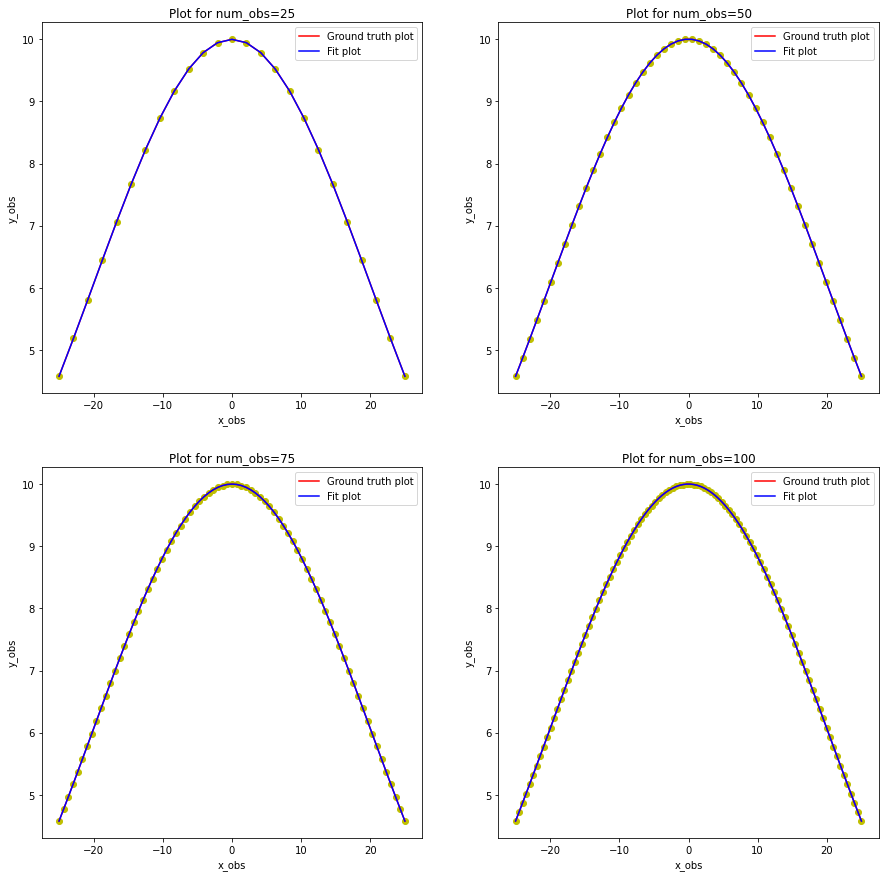

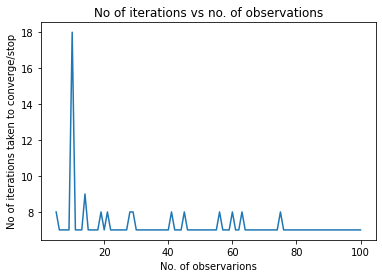

In [17]:
a_gt = 10
m_gt = 0
s_gt = 20
lambd = 0.01
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
num_iter = 10000
obs_list = []
iter_list = []
i = 5
f, axs = plt.subplots(2,2,figsize=(15,15))
while (i<=100):
#     print (i)
    x_obs = np.linspace(-25,25,i)
    r_list.clear()
    y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
    k_lm, iter_lm = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
    obs_list.append(i)
    y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
    if (i%25==0):
        print ("Iteration converged at:(max 10000):",iter_lm)
        print ("Error:",r_list[-1])
        substr = "22"+str(i//25)
        plt.subplot(int(substr))
        plt.plot(x_obs,y_obs,'r')
        plt.scatter(x_obs,y_obs,c='y')
        plt.plot(x_obs,y_app1,'b')
        plt.legend(['Ground truth plot','Fit plot'])
        plt.xlabel('x_obs')
        plt.ylabel('y_obs')
        plt.title("Plot for num_obs="+str(i))
    iter_list.append(iter_lm)
    i = i+1
plt.show()
plt.plot(obs_list,iter_list)
plt.xlabel("No. of observarions")
plt.ylabel("No of iterations taken to converge/stop")
plt.title("No of iterations vs no. of observations")
plt.show()

### Different initialisations

Iteration converged at:(max 200): 7
Error: 1.1044052673094165e-29
Iteration converged at:(max 200): 5
Error: 3.1554436208840472e-30
Iteration converged at:(max 200): 10000
Error: 153.12471140908238


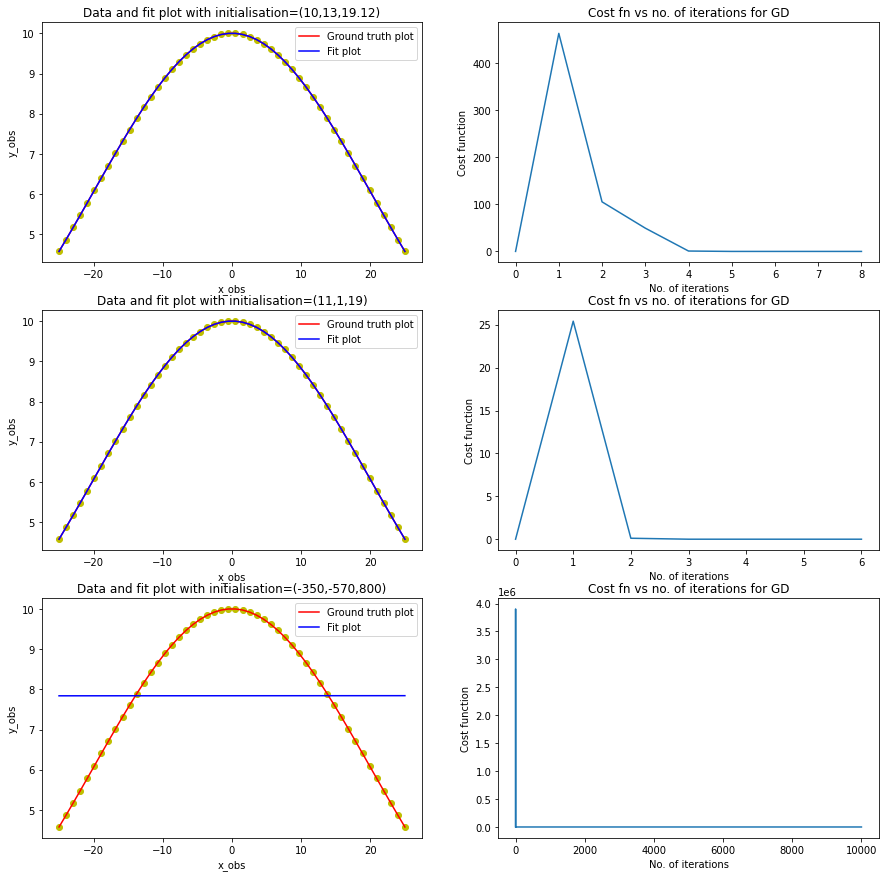

In [18]:
a_gt = 10
m_gt = 0
s_gt = 20
tol = 1e-15
lambd = 0.01
num_iter = 10000
num_obs = 50

f, axs = plt.subplots(3,2,figsize=(15,15))
x_obs = np.linspace(-25,25,num_obs)
r_list.clear()
k0 = np.array([10,13,19.12]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_lm, iter_lm1 = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
print ("Iteration converged at:(max 200):",iter_lm1)
print ("Error:",r_list[-1])
plt.subplot(321)
plt.plot(x_obs,y_obs,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(10,13,19.12)")
plt.subplot(322)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
k0 = np.array([11,1,19]).reshape(3,1)
# k0 = np.array([-20,100,150]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_lm, iter_lm2 = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
print ("Iteration converged at:(max 200):",iter_lm2)
print ("Error:",r_list[-1])
plt.subplot(323)
plt.plot(x_obs,y_obs,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(11,1,19)")
plt.subplot(324)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
k0 = np.array([-350,-570,800]).reshape(3,1)
# k0 = np.array([2,10,9]).reshape(3,1)
y_obs = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
k_lm, iter_lm3 = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
print ("Iteration converged at:(max 200):",iter_lm3)
print ("Error:",r_list[-1])
plt.subplot(325)
plt.plot(x_obs,y_obs,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with initialisation=(-350,-570,800)")
plt.subplot(326)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")
plt.show()

### Noise with different variances:

Iteration converged at:(max 10000): 23
Error: 0.4759065919388466
Iteration converged at:(max 10000): 25
Error: 57.32371430857242
Iteration converged at:(max 10000): 39
Error: 3344.782622761837


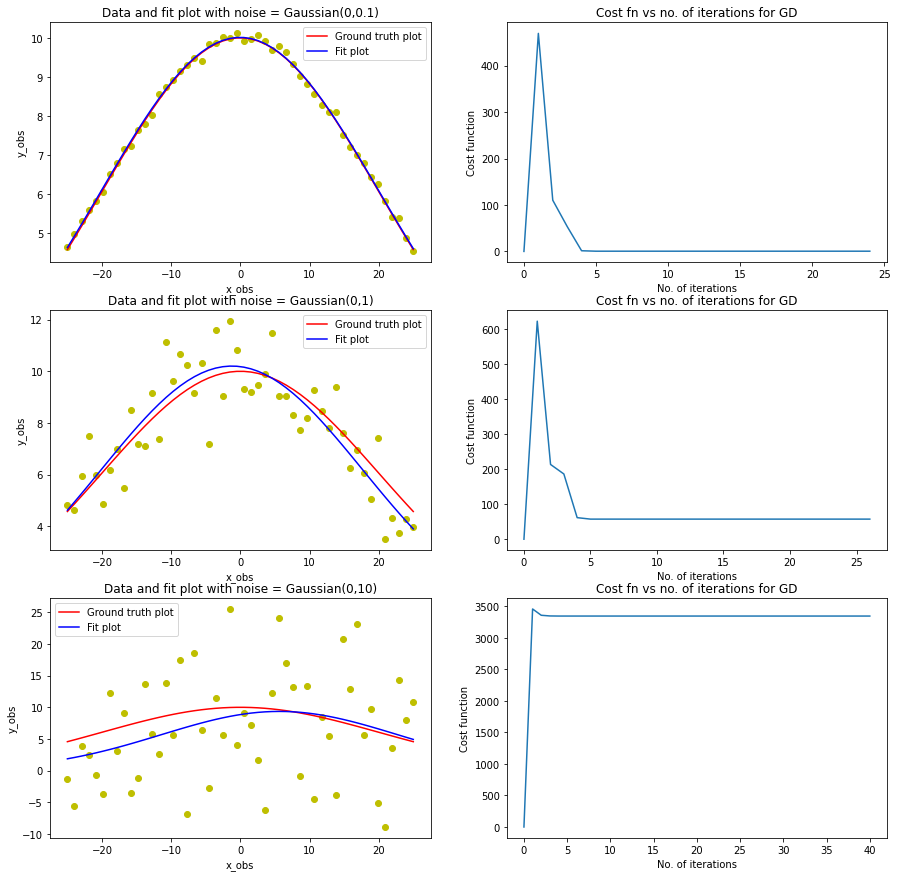

In [19]:
a_gt = 10
m_gt = 0
s_gt = 20
k0 = np.array([10,13,19.12]).reshape(3,1)
tol = 1e-15
lambd = 0.001
num_iter = 10000
num_obs = 50

f, axs = plt.subplots(3,2,figsize=(15,15))
r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,0.1,num_obs)
y_obs = y_gt + noise
k_lm, iter_lm1 = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
print ("Iteration converged at:(max 10000):",iter_lm1)
print ("Error:",r_list[-1])
plt.subplot(321)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,0.1)")
plt.subplot(322)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,1,num_obs)
y_obs = y_gt + noise
k_lm, iter_lm2 = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
print ("Iteration converged at:(max 10000):",iter_lm2)
print ("Error:",r_list[-1])
plt.subplot(323)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,1)")
plt.subplot(324)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

r_list.clear()
x_obs = np.linspace(-25,25,num_obs)
y_gt = a_gt*np.exp(-(x_obs-m_gt)**2/(2*s_gt*s_gt))
noise = np.random.normal(0,10,num_obs)
y_obs = y_gt + noise
k_lm, iter_lm3 = lm(x_obs, y_obs, k0, num_iter, tol,lambd)
y_app1 = k_lm[0]*np.exp(-(x_obs-k_lm[1])**2/(2*k_lm[2]*k_lm[2]))
print ("Iteration converged at:(max 10000):",iter_lm3)
print ("Error:",r_list[-1])
plt.subplot(325)
plt.plot(x_obs,y_gt,'r')
plt.scatter(x_obs,y_obs,c='y')
plt.plot(x_obs,y_app1,'b')
plt.legend(['Ground truth plot','Fit plot'])
plt.xlabel('x_obs')
plt.ylabel('y_obs')
plt.title("Data and fit plot with noise = Gaussian(0,10)")
plt.subplot(326)
plt.plot(r_list)
plt.xlabel('No. of iterations')
plt.ylabel('Cost function')
plt.title("Cost fn vs no. of iterations for GD")

plt.show()


## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
Explain your experimentations with justification here


#### Table for Gradient Descent

| Learning Rate | No. of obs    | Initialisation   | Noise   | Iters to converge | Error                |
| ------------- |:-------------:| ----------------:|--------:| -----------------:|----------------------|
|     0.01      |    50         |   10,13,19.12    | 0       |    2687           | 2.7687440051447067e-26|
|     0.02      |    50         |   10,13,19.12    | 0       |    1365           | 7.170745628458999e-27 |
|     0.03      |    50         |   10,13,19.12    | 0       |    918            | 2.6766050514148927e-27 |
|     0.04      |    50         |   10,13,19.12    | 0       |    689            | 1.7875588112308128e-27|
|     0.0001    |    50         |   10,13,19.12    | 0       |    >10000         | 1.4659371130980998e-08|
|     0.1       |    50         |   10,13,19.12    | 0       |    >10000         | 3226.6794123114432    |
|     0.01      |    25         |   10,13,19.12    | 0       |    5043           | 5.797654336831304e-26|
|     0.01      |    50         |   10,13,19.12    | 0       |    2687           | 2.7687440051447067e-26|
|     0.01      |    75         |   10,13,19.12    | 0       |    1834           | 1.987613936794861e-26|
|     0.01      |    100        |   10,13,19.12    | 0       |    1396           | 1.3852397495680964e-26|
|     0.01      |    50         |   11,1,19        | 0       |    2440           | 2.787045578145835e-26|
|     0.01      |    50         |   -350,570,800          | 0       |    >10000           | 153.93189491998012|


In addition on adding noise: at lr = 0.01, No. of obs = 50, initialisation = 10,13,19.12

| Noise   | Error                   |
|---------|-------------------------|
| N(0,0.1)| 0.5169410189654564      |
| N(0,1)  | 41.71832349757813       |
| N(0,10) | 4394.259844534809       |

#### Table for Gauss Newton

| No. of obs    | Initialisation   | Noise   | Iters to converge | Error|
|:-------------:| ----------------:|--------:| -----------------:|---------------------------|
|    25         |   10,13,19.12    | 0       |    7              | 3.94430452610506e-30|
|    50         |   10,13,19.12    | 0       |    7              | 0|
|    75         |   10,13,19.12    | 0       |    7              | 0| 
|    100        |   10,13,19.12    | 0       |    7              | 3.155443620884048e-29|
|    50         |   10,13,19.12    | 0       |    4              | 0|
|    50         |   11,1,19        | 0       |    4              | 0| 
|    50         |   5,5,5          | 0       |    8              | 0|
|    50         |  -350,-570,800   | 0       |    ERROR          | 0|


In addition on adding noise: No. of obs = 50, initialisation = 10,13,19.12

| Noise   | Error                   | Iters to converge |
|---------|-------------------------|-------------------|
| N(0,0.1)| 0.59548866835126        | 10|
| N(0,1)  | 48.52398234077579       | 12| 
| N(0,10) | 5018.95749163875        | 48|

Note: Gauss Newton throws the error "Singular Matrix" in cases where J*J.T is not invertible. 

#### Table for LM

| Lambda        | No. of obs    | Initialisation   | Noise   | Iters to converge | Error|
| ------------- |:-------------:| ----------------:|--------:| -----------------:|----------|
|     0.01      |    50         |   10,13,19.12    | 0       |    7              | 1.1044052673094165e-29|
|     0.02      |    50         |   10,13,19.12    | 0       |    7              | 1.1044052673094165e-29|
|     0.03      |    50         |   10,13,19.12    | 0       |    7              | 0 |
|     0.04      |    50         |   10,13,19.12    | 0       |    7              | 3.1554436208840472e-30|
|     5         |    50         |   10,13,19.12    | 0       |    8              | 0|
|     10        |    50         |   10,13,19.12    | 0       |    8              | 1.419949629397821e-29|
|     15        |    50         |   10,13,19.12    | 0       |    8              | 0 |
|     20        |    50         |   10,13,19.12    | 0       |    9              | 0|
|     0.01      |    25         |   10,13,19.12    | 0       |    7              | 3.94430452610506e-30|
|     0.01      |    50         |   10,13,19.12    | 0       |    10             | 1.1044052673094165e-29|
|     0.01      |    75         |   10,13,19.12    | 0       |    8              | 1.1044052673094165e-29|
|     0.01      |    100        |   10,13,19.12    | 0       |    7              | 4.73316543132607e-30|
|     0.01      |    50         |   11,1,19        | 0       |    5              | 3.1554436208840472e-30|
|     0.01      |    50         |   -350,-570,800  | 0       |    >10000         | 153.12471140908238|


In addition on adding noise: (with lambda = 0.001 and initialisation 10,13,19.12)

| Noise   | Error                   | Iters to converge | 
|---------|-------------------------|--------------------|
| N(0,0.1)| 0.4759065919388466     | 23|
| N(0,1)  | 57.32371430857242       | 25|
| N(0,10) | 3344.782622761837      | 39|



### Answer for 1.2
Explain your experimentations with justification here:

#### Some general observations:

##### Regarding iterations taken to converge
- Clearly Gradient Descent takes the max. no. of iters to converge compared to LM and Gauss Newton in almost all the cases, and that too depends on the value of the learning rate. This is evident as Gauss Newton and LM use better update rules as compared to Gradient Descent. LM performs slightly better than Gauss Newton by appropriate choice of lambda.

##### Final cost
- The final cost at the end is slightly higher for Gradient Descent as compared to LM and Gauss Newton. This is also attributed to the better update rules for Gauss Newton and LM.

##### Issues  and comparison of algos
- Gauss Newton runs into issues when J*J.T* is not invertible.(this is shown in an example above). Gradient Descent never runs into this issue, while by appropriate choice of lambda(very small lambda), this situation can be avoided in LM, as the addition of lambda to the diagonal elements of J*J.T* helps in making it non-singular.
- The Levenberg-Marquardt method acts more like a gradient-descent method when the parameters are far from their optimal value, and acts more like the Gauss-Newton method when the parameters are close to their optimal value.

##### Learning Rate (for GD) and lambda (for LM)
- Using a large learning rate(>0.1) for Gradient Descent leads to underfitting.(the descent overshoots the minima) Using a small learning rate for Gradient Descent takes very long to converge and it doesn't converge even in 10k iterations. (small ~ 0.0001 or lower). By experiment a learning rate of the order of 0.01 performs best on given data.
- For LM, we multiply the learning rate by 10 in case the cost with the updated k is greater than the current cost, and divide it by 10 in case the cost with the updated k is lower than the current cost. We also vary various initialisations of the lambda to check for variation in no of iterations taken to converge etc.

##### Computational cost
- Gradient Descent is computationally less expensive as compared to Gauss Newton and LM.

##### Changes in initialisation
- Gradient Descent fails to converge in 10k iterations when the initialisation value is too far from ground truth. It converges fast when the initialisation is close from Ground truth. LM also runs into similar issues, while it performs really well in case of close initialisations, it fails to converge in 10k iterations for iterations that are far from the ground truth. Gauss Newton runs into the Singular Matrix error in case of random initialisations, but in general it takes longer to converge and performs poorly in case of initialisations far from ground truth.

##### Adding noise
- On adding noise we see that we see that GD and LM perform better than Gauss Newton, because the step size depends more on the Learning Rate or lambda. LM seems more robust in handling noise. Note that the noise is generated randomly, hence they may be variation in results obtained depending on the noise generated.

Convergence & performance of various algos: 

| HyperParam | variation          | GradDesc      | Gauss-Newton  |LM   |
| -----------|------------------- |:-------------:| -------------:|----:|
|  No.of obs | increase           | fast|unchanged|fast|
| Noise|           increase               |   slow            | slowest(high error) | slow 
| Initialisations| close| fast| unchanged| fast |
| Initialisations| far| doesn't converge | slow | slow/doesn't converge in case too far
| Initial choice of Lambda/Lr | increase | faster(only within a specific range) | --| unchanged|



# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [20]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2

In [25]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()


# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        # TODO2.1: what's current error?
        err = np.sqrt(np.mean((X-P)**2))
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X,P,P0,i,err)
        n = X.shape[1]
        # TODO2.3: Implement ICP to get R, t
        uX = [np.mean(X[0,:]),np.mean(X[1,:])]
        uP = [np.mean(P[0,:]),np.mean(P[1:,])]
        X0 = [(X[0]-uX[0]).T,(X[1]-uX[1]).T]
        Px = [(P[0]-uP[0]).T,(P[1]-uP[1]).T]
        X1 = np.array([X0[0],X0[1]])
        P1 = np.array([Px[0],Px[1]])
        cov = 1/n*np.dot(X1,P1.T)
        U,S,Vt = np.linalg.svd(cov, full_matrices=True)
        R_1 = np.eye(S.shape[0],S.shape[0])
        R_1[1,1] = np.linalg.det(U)*np.linalg.det(Vt)
        R = U @ R_1 @ Vt
        t = uX - np.matmul(R,uP)
        t = np.tile(t,(n,1)).T
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

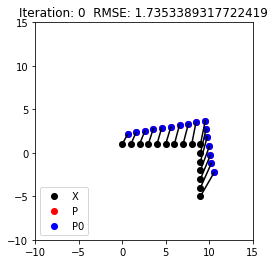

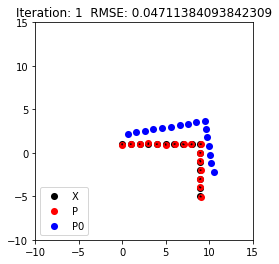

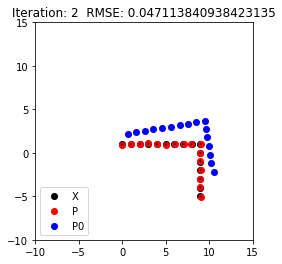

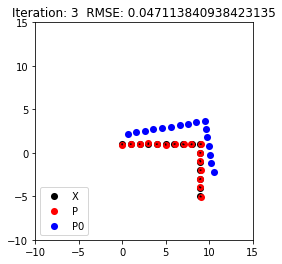

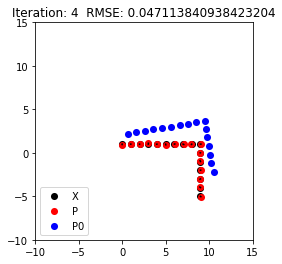

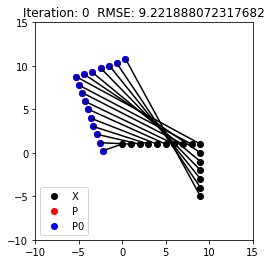

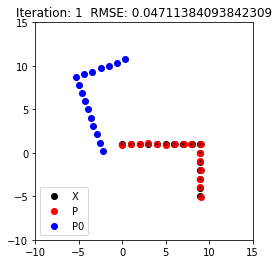

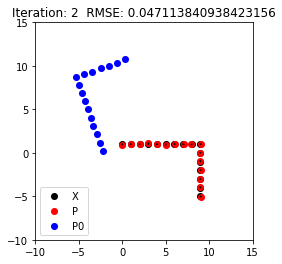

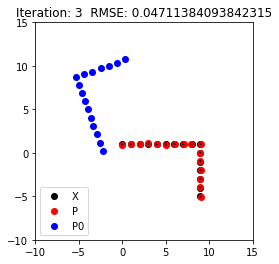

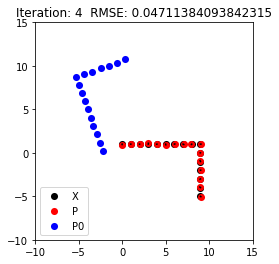

In [26]:
# Call ICP on P1 & P2
# ICP(X,P1)
ICP(X,P1) #Uncomment this
ICP(X,P2) #Uncomment this